### TSFresh For Time Series Analysis 

Load libraries

In [76]:

import numpy as np
import gdal
import glob
import os.path
from rasterio.plot import show
import matplotlib.pyplot as plt
%matplotlib inline

import pandas as pd 
from tsfresh import extract_features
from tsfresh.utilities.distribution import MultiprocessingDistributor

pass the directory path to the raster files

In [ ]:
path = "/Users/adbe/mmann/Demo_Data/temperature/"

Run the follwing methods for reading and preparing data

In [36]:
class sRead:

    def image_names(self):

        '''

        image_names: reads images and returns the name of the file
             image_files - a for loop to connect a directory to the file ending with .tif
             image_names -  a for loop to split and return name
        '''

        #image_files = [f for f in os.listdir(self)if f.endswith('.tif')]
        #image_names = [f.split('.')[0] for f in image_files]
        
        images = glob.glob("{}/**/*.tif".format(self), recursive=True)
        image_name = [os.path.basename(tif).split('.')[0] for tif in images]
    
     
        return image_name


    def image(self):

        '''
        image2array: reads images, stack as bands and returns array
            image - a for loop to connect a directory to the file ending with .tif
            raster_files -  open images with gdal
            raster_array - converts each raster to array and stack them together by columns

        return: array
        '''

        images = glob.glob("{}/**/*.tif".format(self), recursive=True)
        
        raster_files = [gdal.Open(f,gdal.GA_ReadOnly) for f in images]
    
        return raster_files 
    
#         image_names = [os.path.basename(tif).split('.')[0] 
#                        for tif in images]
        
        
    def image2array(self):
        
        
#         raster_files = [gdal.Open(f,gdal.GA_ReadOnly)
#                         for f in sRead.image.images]
        
        raster_array = np.stack([raster.ReadAsArray() 
                                 for raster in sRead.image(self)],
                                axis = -1)
        
        raster_array[np.isnan(raster_array)] = 0
        raster_array[np.isinf(raster_array)] = 0       
        raster_array[raster_array == -np.inf] = 0
        return raster_array
    

    def folders(self):

        for dirname, dir in os.walk(self):
            variable = dirname
            year = dir

        return year, variable



    def ts_series(self):

        '''
        ts_series: reads array and returns multi index data frame for time series
            data - 3 dimensional images shaped to 2d
            index - row id for each pixel
            df - 2d array returned as data frame
            df2 - dataframe stacked for multi index

        return: dataframe
        '''

        rows, cols, num = sRead.image2array(self).shape
        data = sRead.image2array(self).reshape(rows*cols, num)

        index = [str(i)
                 for i in range(1, len(data) + 1)]
        df = pd.DataFrame(data=data[0:, 10:],
                          index=index, columns=sRead.image_names(self))
        df2 = pd.DataFrame(df.stack())
        df2[np.isfinite(df2)].dropna()
        
        return df2

Check the names of the files

In [37]:
f_name = sRead.image_names(path)
f_name

['tmx-200609',
 'tmx-200608',
 'tmx-200606',
 'tmx-200612',
 'tmx-200607',
 'tmx-200611',
 'tmx-200605',
 'tmx-200604',
 'tmx-200610',
 'tmx-200601',
 'tmx-200603',
 'tmx-200602',
 'tmx-200508',
 'tmx-200509',
 'tmx-200507',
 'tmx-200506',
 'tmx-200512',
 'tmx-200504',
 'tmx-200510',
 'tmx-200511',
 'tmx-200505',
 'tmx-200501',
 'tmx-200502',
 'tmx-200503']

Read rasters

In [38]:
rows, cols, num = sRead.image2array(path).shape
data = sRead.image2array(path).reshape(rows*cols, num)


index = [str(i)for i in range(1, len(data) + 1)]
df = pd.DataFrame(data=data[0:,0:], index=index, columns=f_name)

df = df.reindex(sorted(df.columns), axis=1)
df.head()

,tmx-200501,tmx-200502,tmx-200503,tmx-200504,tmx-200505,tmx-200506,tmx-200507,tmx-200508,tmx-200509,tmx-200510,...,tmx-200603,tmx-200604,tmx-200605,tmx-200606,tmx-200607,tmx-200608,tmx-200609,tmx-200610,tmx-200611,tmx-200612
1,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,...,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38
2,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,...,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38
3,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,...,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38
4,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,...,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38
5,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,...,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38,-3.402823e+38


Prepare Rasters as DataFrame series

In [73]:
df2 = df.stack().reset_index()
df2.head()

,level_0,level_1,0
0,1,tmx-200501,-3.402823e+38
1,1,tmx-200502,-3.402823e+38
2,1,tmx-200503,-3.402823e+38
3,1,tmx-200504,-3.402823e+38
4,1,tmx-200505,-3.402823e+38


Create the time frame from existing column and rename columns

In [74]:
df2['time'] = df2['level_1'].str.split('-').str[1]
df2.columns =['id', 'kind', 'value', 'time']
df2.head(25)

,id,kind,value,time
0,1,tmx-200501,-3.402823e+38,200501
1,1,tmx-200502,-3.402823e+38,200502
2,1,tmx-200503,-3.402823e+38,200503
3,1,tmx-200504,-3.402823e+38,200504
4,1,tmx-200505,-3.402823e+38,200505
5,1,tmx-200506,-3.402823e+38,200506
6,1,tmx-200507,-3.402823e+38,200507
7,1,tmx-200508,-3.402823e+38,200508
8,1,tmx-200509,-3.402823e+38,200509
9,1,tmx-200510,-3.402823e+38,200510


Replace Extereme negative values with 0

In [41]:
df3 = df2.replace(df2.value[0], 0)

# stat summary
df3.describe()

,value
count,2.343936e+07
mean,7.526557e+00
std,1.084253e+01
min,-1.056250e+01
25%,0.000000e+00
50%,0.000000e+00
75%,1.543750e+01
max,4.900000e+01


In [77]:

my_df = df3
Distributor = MultiprocessingDistributor(n_workers=16,
                                         disable_progressbar=False,
                                         progressbar_title="Feature Extraction")


fc_parameters = {
    "mean": None,
    "maximum": None,
    "median":None,
    "minimum":None
}

extracted_features = extract_features(my_df,
                                      default_fc_parameters=fc_parameters,
                                      column_sort="time",
                                      column_value="value",
                                      column_id="id",
                                      distributor=Distributor)

Feature Extraction: 100%|██████████| 80/80 [01:32<00:00,  1.16s/it]


In [80]:
extracted_features.describe()

variable,value__maximum,value__mean,value__median,value__minimum
count,976640.000000,976640.000000,976640.000000,976640.000000
mean,12.222482,7.549422,7.146970,3.549364
std,16.656790,10.534896,10.045925,5.584598
min,0.000000,-0.786458,-2.968750,-10.562500
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,31.187500,18.513021,17.437500,8.000000
max,49.000000,32.708332,31.500000,20.000000


Reshape features in dataframe to matrix numpy array

In [84]:

matrix_features = extracted_features.values

num_of_layers = matrix_features.shape[1]

f2Array = matrix_features.reshape(rows, cols, num_of_layers)

print(f2Array.shape)

(1120, 872, 4)


In [85]:
# Export the names of the features

In [44]:
kr =pd.DataFrame(list(matrix_features.columns))
kr.index+=1
kr.to_csv("feature_names.csv")
kr

,0
1,id
2,value__maximum
3,value__mean
4,value__median
5,value__minimum



Summerize and Check outputs

In [86]:
from scipy import stats

for i in range(0, f2Array.shape[2]):
        b = f2Array[:,:,i]
        print(np.mean(b))


12.22248199342861
7.549421728684527
7.14697021828625
3.5493639422677026


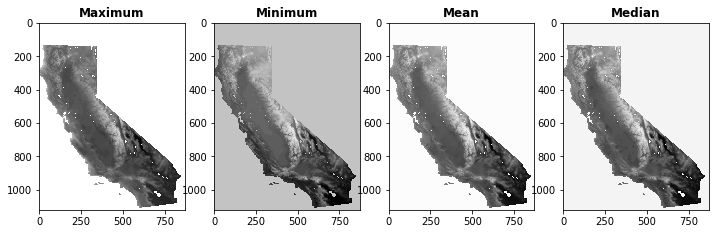

In [87]:
maximum = f2Array[:,:,0]
mean = f2Array[:,:,1]
median = f2Array[:,:,2]
minimum = f2Array[:,:,3]

fig, ((ax1, ax2, ax3, ax4))= plt.subplots(1,4, figsize=(12,12))

show((maximum), ax=ax1, cmap='Greys', title='Maximum')
show((minimum), ax=ax2, cmap='Greys', title='Minimum')
show((mean), ax=ax3, cmap='Greys', title='Mean')
show((median), ax=ax4, cmap='Greys', title='Median')

plt.show()

Export Features to a Raster file. Each feature will be attached as a band

In [88]:

def CreateTiff(Name, Array, driver, NDV, GeoT, Proj, DataType):
    Array[np.isnan(Array)] = NDV
    
    
    rows = Array.shape[1]
    cols = Array.shape[0]
    band = Array.shape[2]
    
    
    driver = gdal.GetDriverByName('GTiff')

    
    DataSet = driver.Create(Name, rows, cols, band, gdal.GDT_Float32)
    DataSet.SetGeoTransform(GeoT)
    DataSet.SetProjection(Proj)
    
    for i in range(band):
        DataSet.GetRasterBand(i+1).WriteArray(Array[:, :, i])
        DataSet.GetRasterBand(i+1).SetNoDataValue(noData)
        
    DataSet.FlushCache()
    return Name

def main(output_file, f2Array, driver, noData, GeoTransform, Projection, DataType):
     # reverse array so the tif looks like the array
    CreateTiff(output_file, f2Array, driver, noData, GeoTransform, Projection, DataType) # convert array to raster


if __name__ == "__main__":
    output_file = "Ts_Features.tiff"
    
    raw_data = sRead.image(path)
    GeoTransform = raw_data[0].GetGeoTransform()
    driver = gdal.GetDriverByName('GTiff')

    noData = -9999

    Projection = raw_data[0].GetProjectionRef()
    DataType = gdal.GDT_Float32

    
    f2Array = f2Array
    main(output_file, f2Array, driver, noData, GeoTransform, Projection, DataType)


Done!